# First UNet arhitecture Results

Import the required libraries

In [1]:
import os
import sys

sys.path.append("/home/mn628/FEDERATED_LEARNING/mn628/")

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from configs.unet_config import *
from src.plot_notebooks import unet_paper_results
from src.UNet_segmentation.prepare_data import *
from src.UNet_segmentation.UNet_model import *

### Load data

In [4]:
# Load your dataset here
train_images, train_masks, val_images, val_masks, test_images, test_masks = load_data()

In [5]:
# shuffle corresponding images and masks
train_images, train_masks = shuffle_data(train_images, train_masks)
val_images, val_masks = shuffle_data(val_images, val_masks)
test_images, test_masks = shuffle_data(test_images, test_masks)

### Evaluation and plotting some segmentation samples

Load saved model for the evaluation

In [ ]:
unet = UNetModel()
unet.model.load_weights("/home/mn628/FEDERATED_LEARNING/mn628/results/UNet_segmentation/results_2_stat_het/unet_model_1.h5")

In [20]:
metrics = unet.evaluate(test_images, test_masks)
print("Evaluation Metrics:", metrics)

  2/222 [..............................] - ETA: 1:04

222/222 [==============================] - 46s 206ms/step
Evaluation Metrics: {'accuracy': 0.9981414971423597, 'precision': 0.6635731149846787, 'recall': 0.39438270176669477, 'f1': 0.49473097791739035, 'dice': 0.49473097791739035, 'iou': 0.32866615246815284}


222/222 ━━━━━━━━━━━━━━━━━━━━ 76s 341ms/step


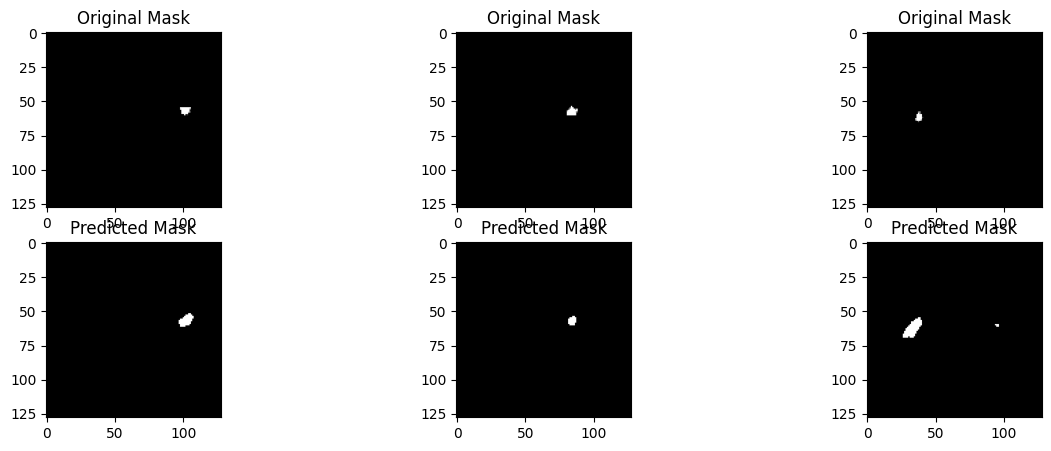

In [6]:
unet.save_samples(test_images, test_masks)

### Plot learning curves

In [6]:
unet_history = {}
with open(
    "/home/mn628/FEDERATED_LEARNING/mn628/results/UNet_segmentation/centralised/unet_history.txt",
    "r",
) as file:
    lines = file.readlines()
    for line in lines:
        nums = line.strip().split(": ")[1].split("[")[1].split("]")[0].split(", ")
        nums = [float(num) for num in nums if num]
        unet_history[line.strip().split(": ")[0]] = nums

unet_aug_history = {}
with open(
    "/home/mn628/FEDERATED_LEARNING/mn628/results/UNet_segmentation/centralised_augmented/unet_history.txt",
    "r",
) as file:
    lines = file.readlines()
    for line in lines:
        nums = line.strip().split(": ")[1].split("[")[1].split("]")[0].split(", ")
        nums = [float(num) for num in nums if num]
        unet_aug_history[line.strip().split(": ")[0]] = nums

In [7]:
unet_aug_history.keys()

dict_keys(['loss', 'dice_coef', 'iou', 'val_loss', 'val_dice_coef', 'val_iou'])

In [8]:
print(max(unet_history["val_dice_coef"]), max(unet_aug_history["val_dice_coef"]))
print(max(unet_history["val_iou"]), max(unet_aug_history["val_iou"]))

0.5347759628295898 0.5703657269477844
0.3782753551006317 0.39446887373924255


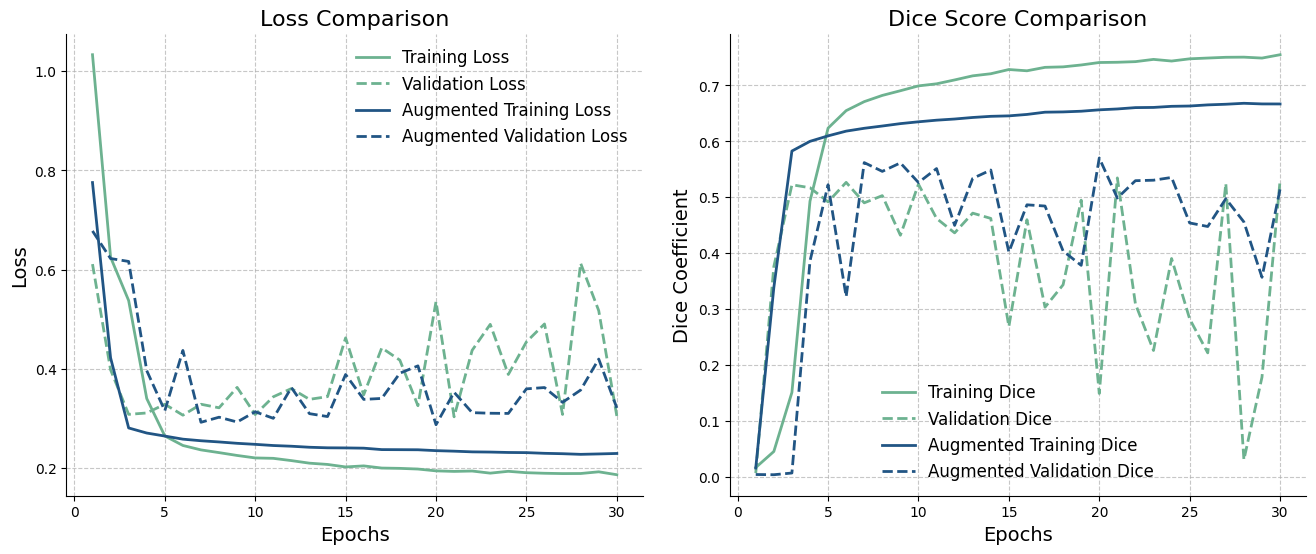

In [9]:
unet_paper_results(unet_history, unet_aug_history)

- Training with augmentation resulted in a more stable learning curve and a smaller gap between training and validation losses, indicating reduced overfitting.
- On the test set, the augmented model achieved a Dice score of 0.538, improving upon the non-augmented model’s score of 0.505 for 3.3%.
